**PROJECT NAME :** DeepCSAT - Ecommerce Customer Satisfaction Score Prediction

Ankita Dutta

**DESCRIPTION :**

This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). In the context of e-commerce, understanding customer satisfaction through their interactions and feedback is crucial for enhancing service quality, customer retention, and overall business growth. By leveraging advanced neural network models, we aim to accurately forecast CSAT scores based on a myriad of interaction-related features, providing actionable insights for service improvement.


Customer satisfaction in the e-commerce sector is a pivotal metric that influences loyalty, repeat business, and word-of-mouth marketing. Traditionally, companies have relied on direct surveys to gauge customer satisfaction, which can be time-consuming and may not always capture the full spectrum of customer experiences. With the advent of deep learning, it's now possible to predict customer satisfaction scores in real-time, offering a granular view of service performance and identifying areas for immediate improvement.

**Github Link :**  https://github.com/ankitaXdutta/deepcsat

**SUMMARY :**

The primary goal of this project is to develop a deep learning model that can accurately predict CSAT scores based on customer interactions and feedback. By doing so, we aim to provide e-commerce businesses with a powerful tool to monitor and enhance customer satisfaction in real time, thereby improving service quality and fostering customer loyalty

In [257]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and NLP
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping

import re
import string


In [259]:
# Load the dataset
file_path = '/content/drive/MyDrive/deepcsat/data.csv'
df = pd.read_csv(file_path)

# Show basic info
print("Shape:", df.shape)
df.head()


Shape: (85907, 20)


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [260]:
df.shape


(85907, 20)

In [261]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [262]:
#null values by column
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [263]:
# Display basic info: column names, non-nulls, and data types
print("🔍 Dataset Info:")
df.info()

# Display column data types and unique values count
print("\n🧩 Column Types and Unique Value Counts:")
col_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Unique Values': df.nunique(),
    'Sample Value': df.iloc[0]
}).sort_index()

display(col_info)


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_

,Data Type,Unique Values,Sample Value
Agent Shift,object,5,Morning
Agent_name,object,1371,Richard Buchanan
CSAT Score,int64,5,5
Customer Remarks,object,18231,NaN
Customer_City,object,1782,NaN
Issue_reported at,object,30923,01/08/2023 11:13
Item_price,float64,2789,NaN
Manager,object,6,Jennifer Nguyen
Order_id,object,67675,c27c9bb4-fa36-4140-9f1f-21009254ffdb
Product_category,object,9,NaN


**DATASET SUMMARY :**

The dataset contains 85,907 rows and 20 columns, capturing customer service interactions. Key fields include unique IDs, channel, category, sub-category, agent details, supervisor, manager, tenure, agent shift, and CSAT score. It tracks order and issue timestamps, though many fields like customer remarks, order details, city, product category, price, and handling time have significant missing values. All agent, supervisor, manager, tenure, shift, and CSAT fields are complete. The dataset combines categorical, textual, and numeric data, enabling analysis of service performance, agent effectiveness, and customer satisfaction trends.

Unique id: object, 85,907 unique values, 0 nulls

channel_name: object, 3 unique values, 0 nulls

category: object, 12 unique values, 0 nulls

Sub-category: object, 57 unique values, 0 nulls

Customer Remarks: object, 18,231 unique values, 57,165 nulls

Order_id: object, 67,675 unique values, 18,232 nulls

order_date_time: object, 13,766 unique values, 68,693 nulls

Issue_reported at: object, 30,923 unique values, 0 nulls

issue_responded: object, 30,262 unique values, 0 nulls

Survey_response_Date: object, 31 unique values, 0 nulls

Customer_City: object, 1,782 unique values, 68,828 nulls

Product_category: object, 9 unique values, 68,711 nulls

Item_price: float64, 2,789 unique values, 68,701 nulls

connected_handling_time: float64, 211 unique values, 85,665 nulls

Agent_name: object, 1,371 unique values, 0 nulls

Supervisor: object, 40 unique values, 0 nulls

Manager: object, 6 unique values, 0 nulls

Tenure Bucket: object, 5 unique values, 0 nulls

Agent Shift: object, 5 unique values, 0 nulls

CSAT Score: int64, 5 unique values, 0 nulls

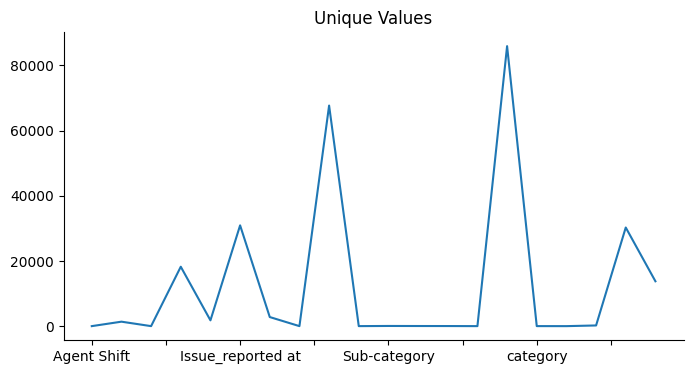

In [264]:
# Unique Values

from matplotlib import pyplot as plt
col_info['Unique Values'].plot(kind='line', figsize=(8, 4), title='Unique Values')
plt.gca().spines[['top', 'right']].set_visible(False)

Missing Value Summary:


,Missing Values,Percent Missing
connected_handling_time,85665,99.72
Customer_City,68828,80.12
Product_category,68711,79.98
Item_price,68701,79.97
order_date_time,68693,79.96
Customer Remarks,57165,66.54
Order_id,18232,21.22


<ipython-input-265-85e746563c0b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df.index, y=missing_df['Missing Values'], palette='magma')


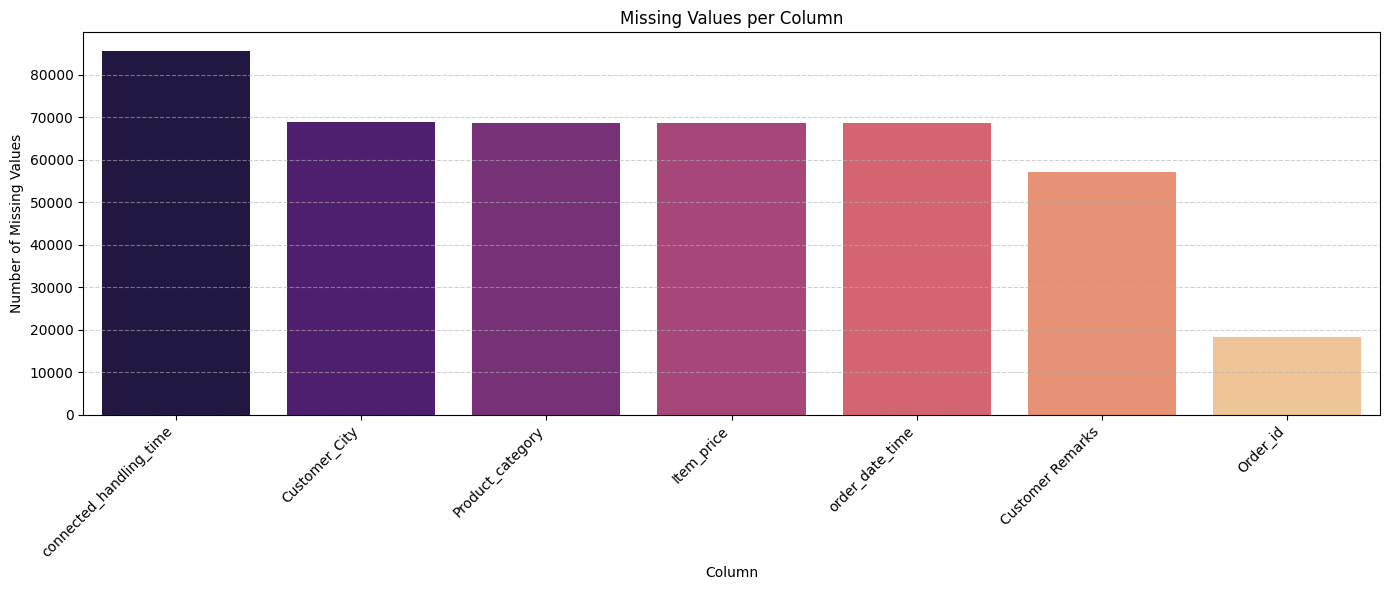

In [265]:
#INSIGHTS ON MISSING VALUES
# Count missing values per column
missing_counts = df.isnull().sum()

# Calculate percentage of missing values
missing_percent = (missing_counts / len(df)) * 100

# Combine into a DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percent Missing': missing_percent.round(2)
})

# Sort by most missing
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

# Display
print("Missing Value Summary:")
display(missing_df)

# Visualization
plt.figure(figsize=(14, 6))
sns.barplot(x=missing_df.index, y=missing_df['Missing Values'], palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Column')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## TOP 14 INSIGHTS FROM OUR DATA DISTRIBUTION

<ipython-input-266-725fc1d7df0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CSAT Score', palette='coolwarm')


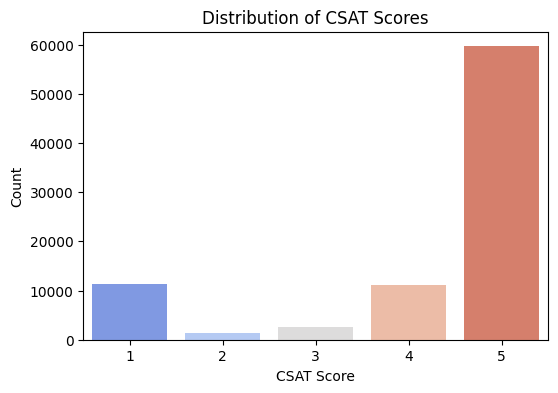

In [266]:
# 1. Distribution of CSAT Scores (Target Variable Overview)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='CSAT Score', palette='coolwarm')
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()

**The chart shows that the majority of customers gave a CSAT score of 5, indicating high satisfaction. Scores of 2 and 3 are rare, suggesting a polarized distribution with most ratings being either very high or very low.**

<ipython-input-267-1ea246faabd9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='channel_name', y='CSAT Score', palette='Set2')


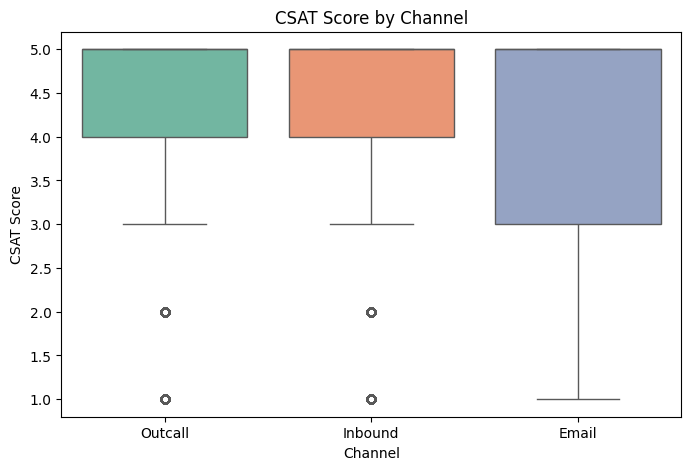

In [267]:
# 2. CSAT by Customer Service Channel (Inbound, Outcall, etc.)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='channel_name', y='CSAT Score', palette='Set2')
plt.title('CSAT Score by Channel')
plt.xlabel('Channel')
plt.ylabel('CSAT Score')
plt.show()

**Email shows the widest spread in CSAT scores with a lower median and more low-score outliers, indicating less consistent customer satisfaction. In contrast, Inbound and Outcall channels have higher and more tightly grouped CSAT scores, suggesting better and more consistent customer experiences.**

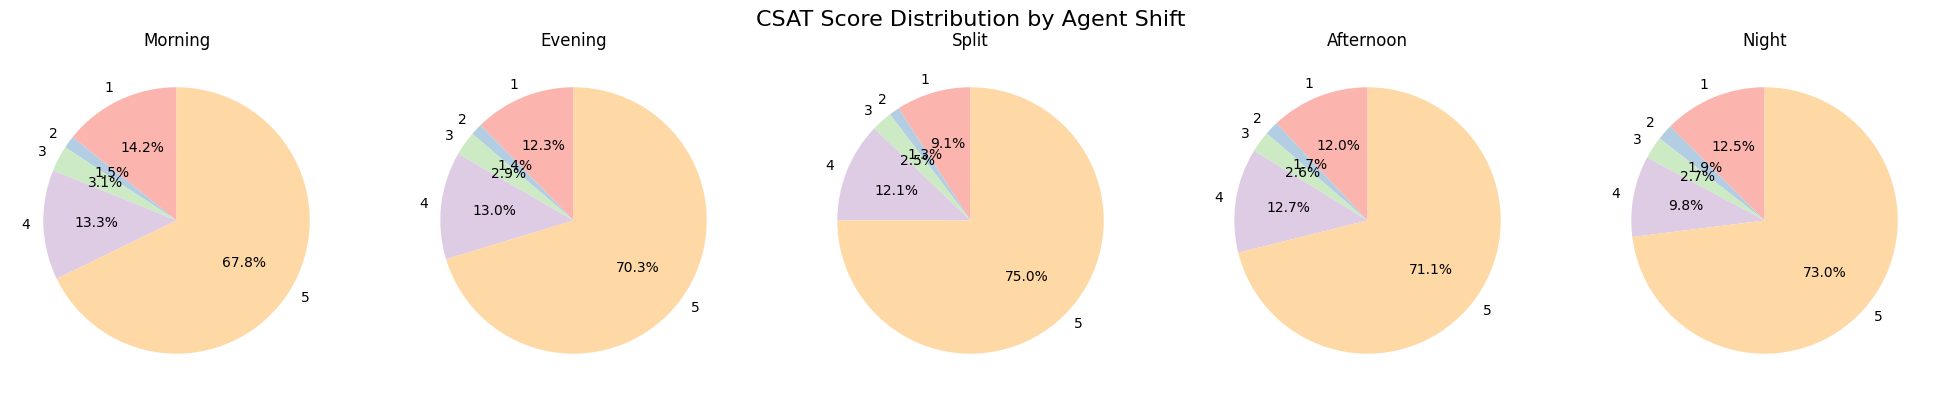

In [268]:
# 3. CSAT by Agent Shift (Morning, Evening, Night)
import matplotlib.pyplot as plt

# Get the unique shifts
shifts = df['Agent Shift'].dropna().unique()

# Define CSAT score categories
csat_scores = sorted(df['CSAT Score'].dropna().unique())

# Set up figure layout
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('CSAT Score Distribution by Agent Shift', fontsize=16)

# Generate a pie chart for each shift
for i, shift in enumerate(shifts):
    shift_data = df[df['Agent Shift'] == shift]['CSAT Score'].value_counts().reindex(csat_scores, fill_value=0)
    axes[i].pie(shift_data, labels=csat_scores, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
    axes[i].set_title(f"{shift}")

plt.tight_layout()
plt.show()


**The Split shift has the highest percentage of top CSAT scores (75%), indicating excellent customer satisfaction during that period. In contrast, the Morning shift has the lowest proportion of top ratings (67.8%) and the highest share of score 1 (14.2%), suggesting potential service quality issues.**

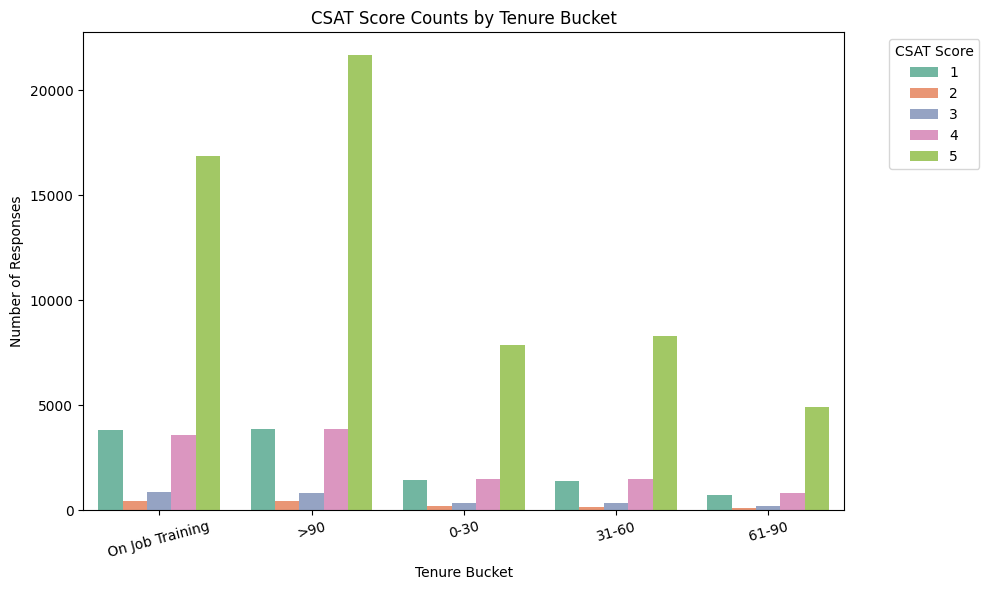

In [269]:
# 4. How many responses of each CSAT score within each tenure bucket
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Tenure Bucket', hue='CSAT Score', palette='Set2')
plt.title('CSAT Score Counts by Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Number of Responses')
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



**Employees in the ">90" and "On Job Training" tenure buckets have the highest number of CSAT responses overall, with a strong skew toward the highest satisfaction score (CSAT 5). Shorter tenures like "0-30" and "31-60" show fewer responses but still maintain a high proportion of CSAT 5, indicating positive early impressions.**

<ipython-input-270-5a972ab9129f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Product_category'].notna()],


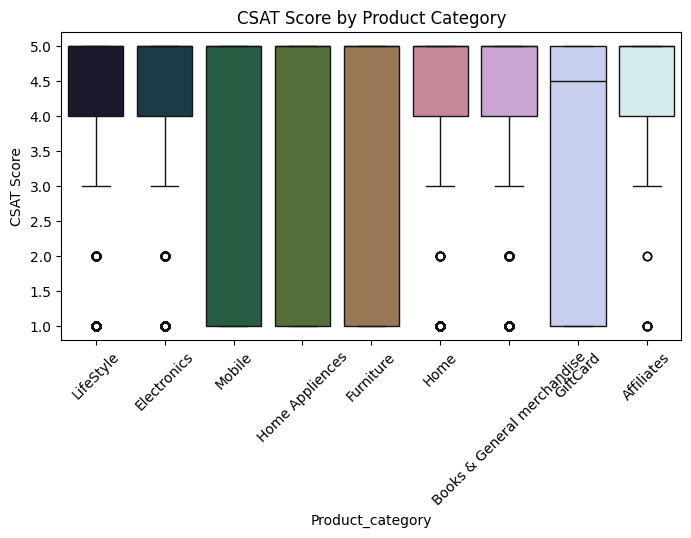

In [270]:
# 5. CSAT by Product Category (If available/filled)
plt.figure(figsize=(8,4))
sns.boxplot(data=df[df['Product_category'].notna()],
            x='Product_category', y='CSAT Score', palette='cubehelix')
plt.title('CSAT Score by Product Category')
plt.xticks(rotation=45)
plt.show()


**Most product categories, such as Mobile, Home Appliances, and Furniture, show consistently high CSAT scores with medians at 5 and narrow interquartile ranges, indicating strong customer satisfaction. In contrast, categories like GiftCard and Books & General Merchandise display wider variability and lower outliers, suggesting inconsistent customer experiences.**

<ipython-input-271-dda9f5c87eef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='category', y='CSAT Score', palette='viridis', order=cat_order)


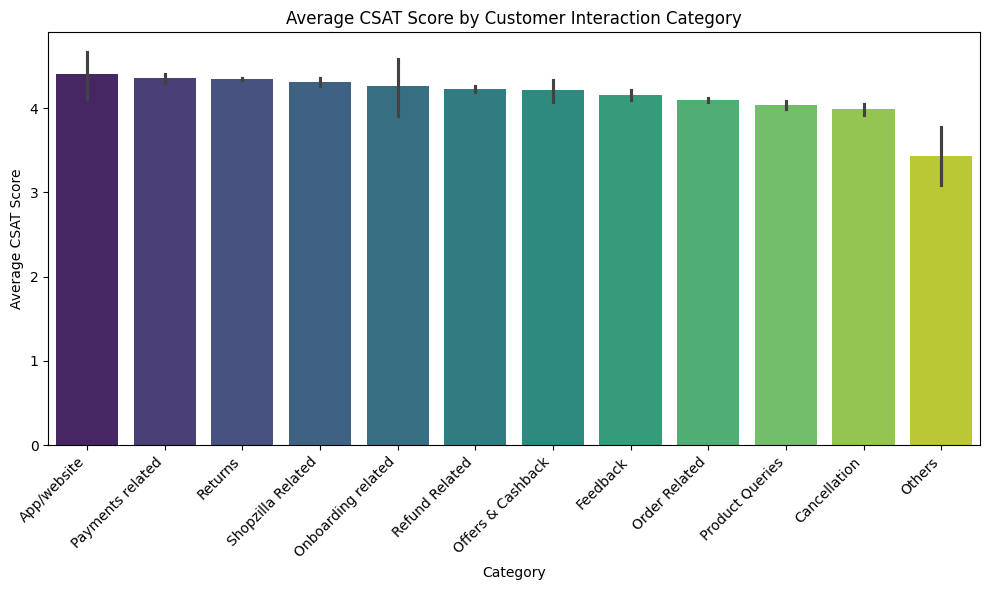

In [271]:
# 6. CSAT by Category (e.g., Returns, Cancellations)
plt.figure(figsize=(10,6))
cat_order = df.groupby('category')['CSAT Score'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='category', y='CSAT Score', palette='viridis', order=cat_order)
plt.title('Average CSAT Score by Customer Interaction Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average CSAT Score')
plt.xlabel('Category')
plt.tight_layout()
plt.show()



**This chart shows that App/Website, Payments, and Returns related interactions have the highest customer satisfaction (CSAT) scores—above 4.3—indicating these areas are performing well. On the other hand, Cancellations, Product Queries, and especially the Others category exhibit noticeably lower satisfaction scores, with “Others” falling below 3.5 and showing higher variability (as seen in the large error bar).**

<ipython-input-272-7d0c022662ad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_sub, x='Sub-category', y='CSAT Score', palette='Spectral')


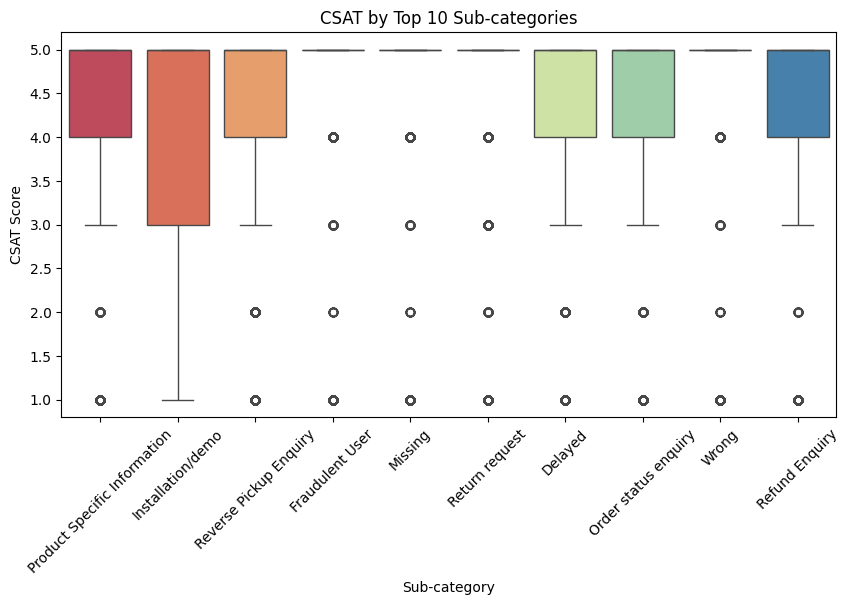

In [272]:
# 7. CSAT by Sub-Category (Top 10 only)
top_subcats = df['Sub-category'].value_counts().nlargest(10).index
df_top_sub = df[df['Sub-category'].isin(top_subcats)]

plt.figure(figsize=(10,5))
sns.boxplot(data=df_top_sub, x='Sub-category', y='CSAT Score', palette='Spectral')
plt.title('CSAT by Top 10 Sub-categories')
plt.xticks(rotation=45)
plt.show()


**The chart shows that while most top sub-categories like 'Return request' and 'Fraudulent User' maintain consistently high CSAT scores, sub-categories such as 'Installation/demo' and 'Product Specific Information' exhibit wider score distributions, indicating inconsistent customer satisfaction. The code filters for the top 10 sub-categories by frequency and uses a boxplot to effectively visualize the spread and central tendency of CSAT scores across these areas.**

<ipython-input-273-7d8971c74592>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Manager', y='CSAT Score', palette='cool')


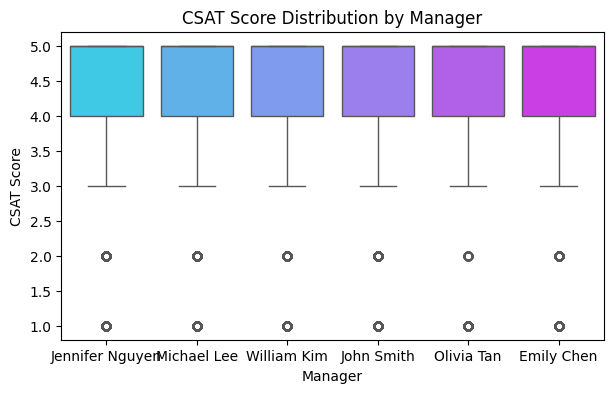

In [273]:
# 8. CSAT by Manager (To see if team leadership affects scores)
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Manager', y='CSAT Score', palette='cool')
plt.title('CSAT Score Distribution by Manager')
plt.show()


**All managers maintain a high median CSAT score of 5, showing strong overall customer satisfaction. Minor differences in score spread suggest some variability in handling challenging cases, but no major outliers**

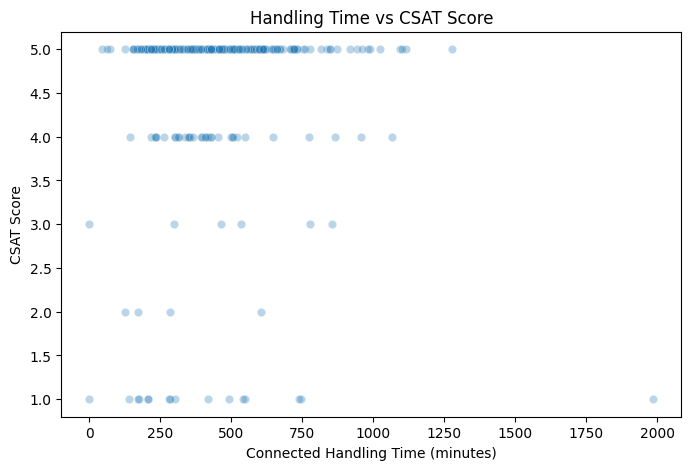

In [274]:
# 9. Handling Time vs CSAT (as Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='connected_handling_time', y='CSAT Score', alpha=0.3)
plt.title('Handling Time vs CSAT Score')
plt.xlabel('Connected Handling Time (minutes)')
plt.ylabel('CSAT Score')
plt.show()


**Most CSAT scores remain high regardless of handling time, indicating customer satisfaction is generally maintained. However, extremely long handling times occasionally coincide with low scores, hinting at potential frustration in outlier cases.**

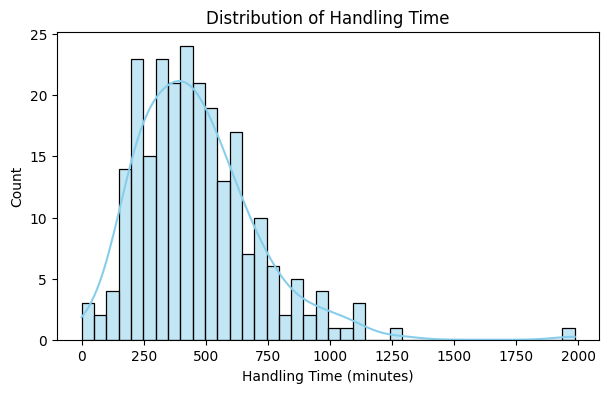

In [275]:
# 10. Distribution of Handling Time (outlier awareness)
plt.figure(figsize=(7,4))
sns.histplot(df['connected_handling_time'].dropna(), bins=40, kde=True, color='skyblue')
plt.title('Distribution of Handling Time')
plt.xlabel('Handling Time (minutes)')
plt.show()


**The distribution of handling time is positively skewed, indicating that while the majority of cases are resolved within 200–600 minutes, a long tail of cases takes significantly longer. This suggests operational efficiency for most interactions, but the presence of extreme outliers (beyond 1000 minutes) could point to process issues, special cases, or data anomalies requiring deeper review.**

<ipython-input-276-88c563b6a140>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcats.values, y=top_subcats.index, palette='viridis')


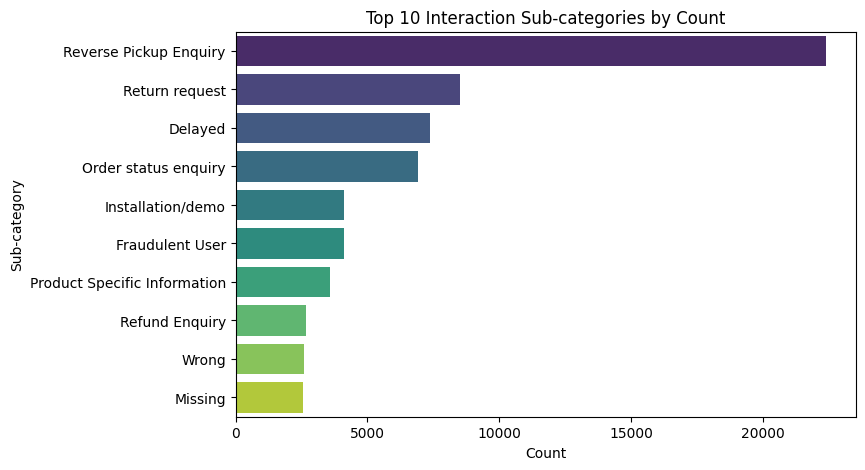

In [276]:
# 11. Top 10 Sub-categories by Frequency
top_subcats = df['Sub-category'].value_counts().nlargest(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_subcats.values, y=top_subcats.index, palette='viridis')
plt.title('Top 10 Interaction Sub-categories by Count')
plt.xlabel('Count')
plt.ylabel('Sub-category')
plt.show()


**Reverse Pickup Enquiry dominates all other sub-categories, accounting for a significantly higher volume of interactions. This suggests a major focus area for operational improvement or policy review compared to other concerns like returns or delays.**

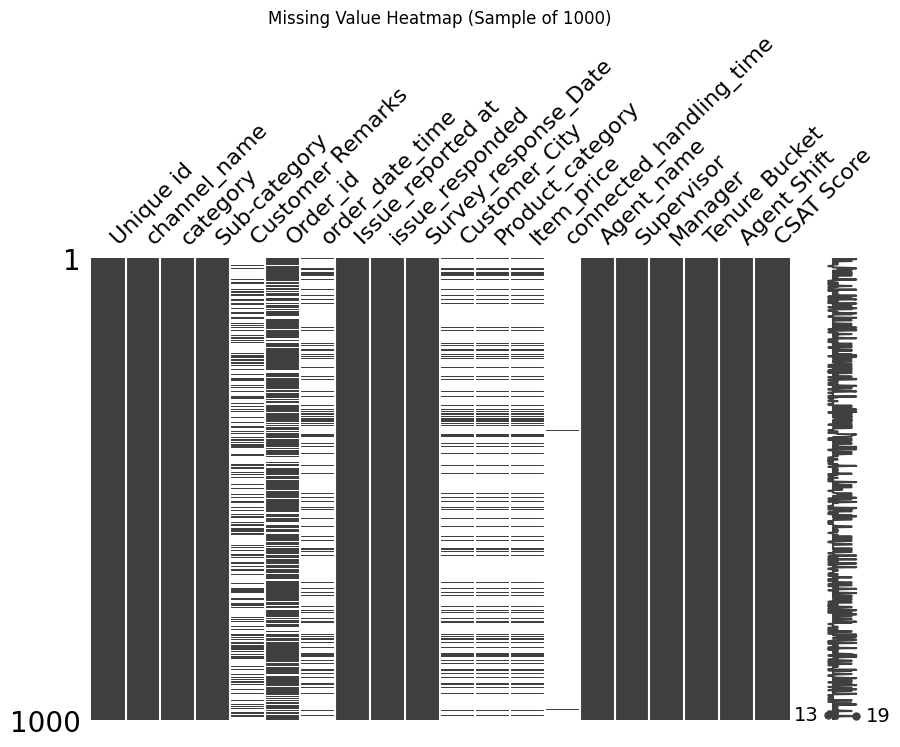

In [277]:
# 12. Missing Values Heatmap (important for data cleaning)
import missingno as msno

msno.matrix(df.sample(1000), figsize=(10,6))
plt.title('Missing Value Heatmap (Sample of 1000)')
plt.show()


<ipython-input-278-0645f4c61cba>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sub-category', y='CSAT Score', estimator=np.mean, ci=None, palette='coolwarm')
<ipython-input-278-0645f4c61cba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sub-category', y='CSAT Score', estimator=np.mean, ci=None, palette='coolwarm')


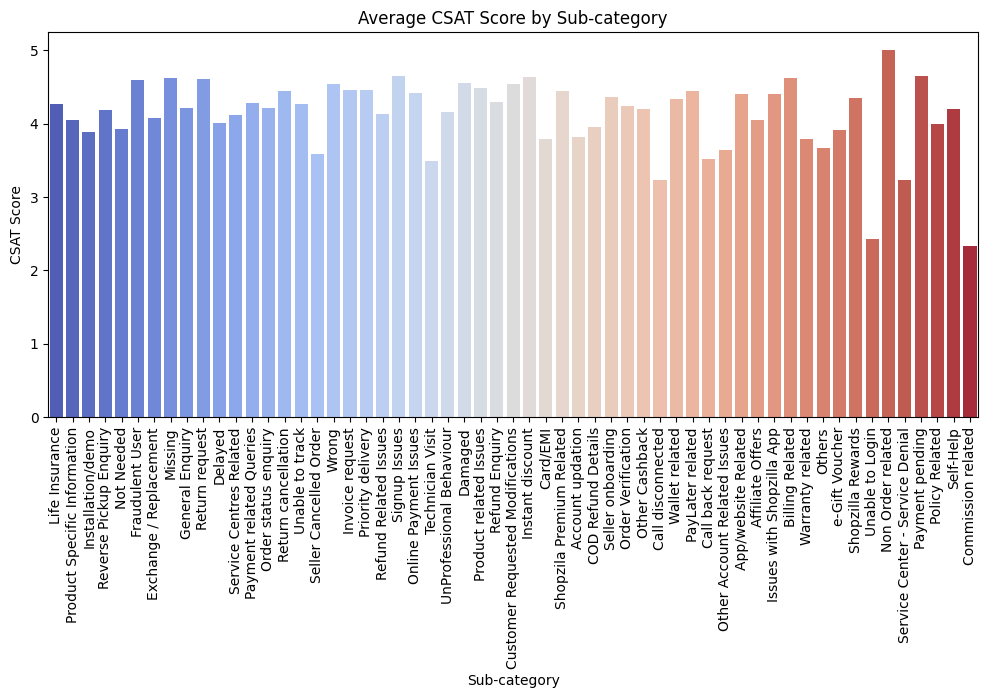

In [278]:
# 13. Average CSAT Score by Sub-category
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Sub-category', y='CSAT Score', estimator=np.mean, ci=None, palette='coolwarm')
plt.title('Average CSAT Score by Sub-category')
plt.xticks(rotation=90)
plt.show()

**Reverse Pickup Enquiry has the highest interaction volume but only moderate CSAT (~4.0), while sub-categories like Commission and Policy related score the lowest (<3.0), indicating key dissatisfaction areas. High CSAT scores (4.5+) in categories like Life Insurance and Product Info suggest best practices that could be replicated. Focus improvement on high-volume, mid-CSAT issues for maximum impact.**

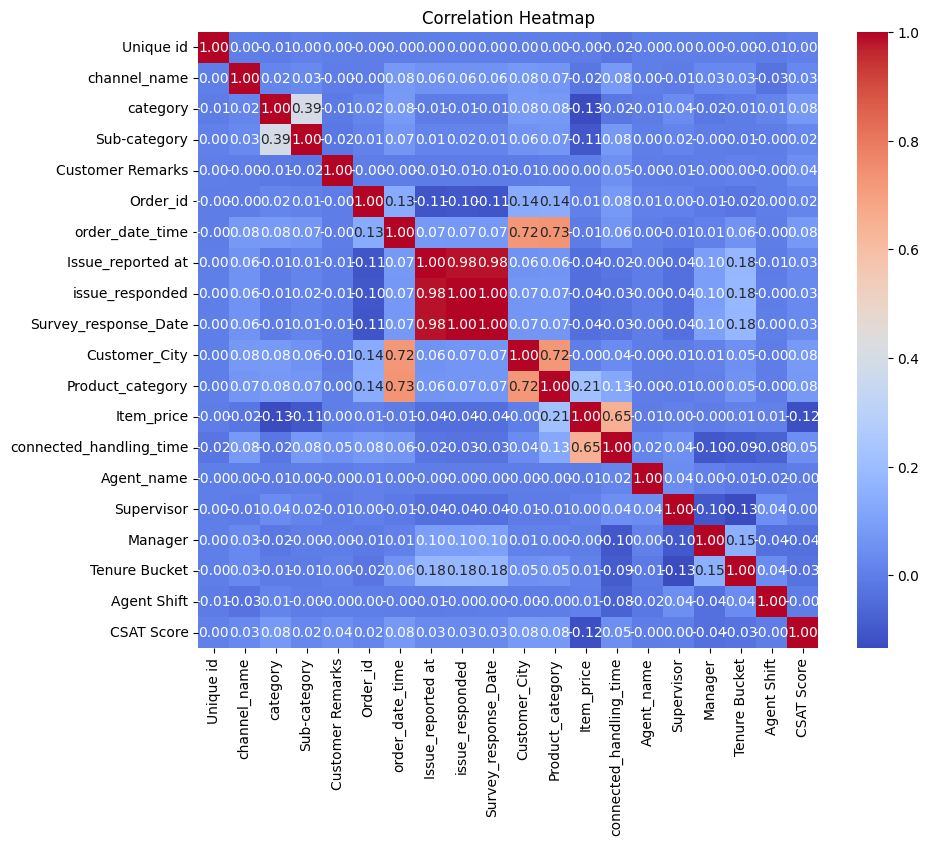

In [279]:
# 14. corrlation heatmap
encoded_df = df.copy()
for col in encoded_df.select_dtypes(include='object'):
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

plt.figure(figsize=(10,8))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## HANDLING MISSING VALUES

In [280]:
# Check missing values before dropping columns
missing_before = df.isnull().sum().sort_values(ascending=False)
print("Missing values before dropping columns:\n", missing_before)


Missing values before dropping columns:
 connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
Unique id                      0
Sub-category                   0
category                       0
channel_name                   0
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


**Six columns have high missing values—four of them (Customer_City, Product_category, Item_price, order_date_time) exceed 78% missingness and offer limited predictive value, so they can be safely dropped. We’ll also remove ID columns (Order_id, Unique id) as they do not contribute to CSAT prediction; however, connected_handling_time is retained due to its potential influence on satisfaction.**

In [281]:
# Drop columns with 78% missing values and limited predictive potential
# - Customer_City: Mostly missing, difficult to use due to high cardinality
# - Product_category: Could be useful, but too sparse to be reliable
# - Item_price: Too many missing values, and inconsistent availability may add noise
# - order_date_time: Could be useful if parsed, but not in raw format and mostly missing
# - Customer Remarks: Unstructured and heavily missing; not feasible for current analysis

df.drop(['Customer_City', 'Product_category', 'Item_price','order_date_time', 'Customer Remarks'], axis=1, inplace=True)

# Drop ID columns – not useful for CSAT prediction
df.drop(['Order_id', 'Unique id'], axis=1, inplace=True)


In [282]:
# Check missing values after dropping columns
missing_after = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values after dropping columns:\n", missing_after)



Missing values after dropping columns:
 connected_handling_time    85665
category                       0
Sub-category                   0
Issue_reported at              0
channel_name                   0
issue_responded                0
Survey_response_Date           0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


In [283]:
print("Shape of the DataFrame after dropping columns:", df.shape)


Shape of the DataFrame after dropping columns: (85907, 13)


In [284]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

## FEATURE ENGINEERING

In [285]:
# Convert 'Issue_reported at' and 'issue_responded' to datetime (with time)
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M', errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M', errors='coerce')

# Convert 'Survey_response_Date' to datetime (without time)
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], format='%d-%b-%y', errors='coerce')

# Check datetime columns
datetime_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime']).columns
print("Datetime columns:", datetime_cols)


Datetime columns: Index(['Issue_reported at', 'issue_responded', 'Survey_response_Date'], dtype='object')


In [286]:
# Calculate response time in minutes before dropping
df['response_time_mins'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60


In [287]:
# Display the first 10 rows of the relevant columns for manual verification
print(df[['Issue_reported at', 'issue_responded', 'response_time_mins']].head(10))

# Print the count of non-null values in 'response_time_mins'
print(f"\nNon-null count in 'response_time_mins': {df['response_time_mins'].notnull().sum()} out of {len(df)}")


    Issue_reported at     issue_responded  response_time_mins
0 2023-08-01 11:13:00 2023-08-01 11:47:00                34.0
1 2023-08-01 12:52:00 2023-08-01 12:54:00                 2.0
2 2023-08-01 20:16:00 2023-08-01 20:38:00                22.0
3 2023-08-01 20:56:00 2023-08-01 21:16:00                20.0
4 2023-08-01 10:30:00 2023-08-01 10:32:00                 2.0
5 2023-08-01 15:13:00 2023-08-01 18:39:00               206.0
6 2023-08-01 15:31:00 2023-08-01 23:52:00               501.0
7 2023-08-01 16:17:00 2023-08-01 16:23:00                 6.0
8 2023-08-01 21:03:00 2023-08-01 21:07:00                 4.0
9 2023-08-01 23:31:00 2023-08-01 23:36:00                 5.0

Non-null count in 'response_time_mins': 85907 out of 85907


**The response_time_mins column appears accurate, as it correctly reflects the time difference in minutes between Issue_reported at and issue_responded. Since the response time has now been extracted as a usable numeric feature, the original datetime columns can be safely dropped to simplify the dataset.**

In [288]:
# Print updated shape and columns
print("Updated shape:", df.shape)
print("Remaining columns:", df.columns.tolist())

Updated shape: (85907, 14)
Remaining columns: ['channel_name', 'category', 'Sub-category', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score', 'response_time_mins']


In [289]:
for col in datetime_cols:
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_day'] = df[col].dt.day
    df[col + '_month'] = df[col].dt.month
    df[col + '_weekday'] = df[col].dt.weekday

# Then drop the original datetime columns
df = df.drop(columns=datetime_cols)

In [290]:
df['Agent Shift'].value_counts()

,count
Agent Shift,
Morning,41426
Evening,33677
Afternoon,5840
Split,3648
Night,1316


In [291]:
print(df["Manager"].unique())  # See what's actually in the column before mapping


['Jennifer Nguyen' 'Michael Lee' 'William Kim' 'John Smith' 'Olivia Tan'
 'Emily Chen']


In [292]:
print(df["Manager"].dtype)
print(df["Manager"].head(10))


object
0    Jennifer Nguyen
1        Michael Lee
2        William Kim
3         John Smith
4        Michael Lee
5         John Smith
6         Olivia Tan
7    Jennifer Nguyen
8         John Smith
9        Michael Lee
Name: Manager, dtype: object


In [293]:
# Strip spaces and map
df['Manager'] = df['Manager'].str.strip()  # Remove any leading/trailing whitespace
df['Manager'] = df["Manager"].map({
    'John Smith': 0,
    'Michael Lee': 1,
    'Jennifer Nguyen': 2,
    'Emily Chen': 3,
    'William Kim': 4,
    'Olivia Tan': 5
})


In [294]:
print(df['Manager'].unique())  # Should now show [0 1 2 3 4 5] or subset


[2 1 4 0 5 3]


In [295]:
# Label Encoding for categorical columns with assumed non-ordinal values
le = LabelEncoder()
df['Agent Shift'] = le.fit_transform(df['Agent Shift'])       # Converts shift labels to integers
df['Tenure Bucket'] = le.fit_transform(df['Tenure Bucket'])   # Encodes tenure levels
df['channel_name'] = le.fit_transform(df['channel_name'])     # Encodes communication channels
df['category'] = le.fit_transform(df['category'])             # Encodes broad issue categories



In [296]:
# Install category_encoders if not already installed
!pip install category_encoders

# Then import TargetEncoder
from category_encoders import TargetEncoder


In [297]:
# Target Encoding for high-cardinality columns with potential predictive relationship to CSAT
encoder = TargetEncoder()
df['Agent_name'] = encoder.fit_transform(df['Agent_name'], df['CSAT Score'])         # Uses CSAT mean per agent
df['Supervisor'] = encoder.fit_transform(df['Supervisor'], df['CSAT Score'])         # Uses CSAT mean per supervisor
df['Sub-category'] = encoder.fit_transform(df['Sub-category'], df['CSAT Score'])     # Uses CSAT mean per sub-category

In [298]:
for col in ['Agent_name', 'Supervisor', 'Sub-category']:
    print(f"\nColumn: {col}")
    print("Unique values:", df[col].nunique())
    print("Sample values:", df[col].unique()[:10])
    print("Data type:", df[col].dtype)



Column: Agent_name
Unique values: 1228
Sample values: [4.28136945 4.51236498 4.46464253 3.99424238 4.03226445 4.07066078
 4.21979867 4.20606741 4.63257576 4.26480742]
Data type: float64

Column: Supervisor
Unique values: 40
Sample values: [4.17022285 4.07017544 4.19603267 4.32646664 4.11607661 4.07598784
 4.29253112 4.23974445 4.35784728 4.31158358]
Data type: float64

Column: Sub-category
Unique values: 57
Sample values: [4.25290639 4.0440234  3.88313897 4.18946804 3.921875   4.59493671
 4.07142857 4.61384977 4.21079692 4.61328171]
Data type: float64


In [299]:
df.drop(columns=['connected_handling_time'], inplace=True)


In [300]:
# List of columns to keep
columns_to_keep = [
    'channel_name',
    'category',
    'Sub-category',
    'Agent_name',
    'Supervisor',
    'Manager',
    'Tenure Bucket',
    'Agent Shift',
    'response_time_mins',
    'Issue_reported at_hour',
    'Issue_reported at_weekday',
    'CSAT Score'
]

# Drop the columns not in the columns_to_keep list
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df.drop(columns=columns_to_drop, inplace=True)


In [301]:
X = df.drop('CSAT Score', axis=1)  # Features (independent variables)
y = df['CSAT Score']               # Target (dependent variable)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channel_name               85907 non-null  int64  
 1   category                   85907 non-null  int64  
 2   Sub-category               85907 non-null  float64
 3   Agent_name                 85907 non-null  float64
 4   Supervisor                 85907 non-null  float64
 5   Manager                    85907 non-null  int64  
 6   Tenure Bucket              85907 non-null  int64  
 7   Agent Shift                85907 non-null  int64  
 8   CSAT Score                 85907 non-null  int64  
 9   response_time_mins         85907 non-null  float64
 10  Issue_reported at_hour     85907 non-null  int32  
 11  Issue_reported at_weekday  85907 non-null  int32  
dtypes: float64(4), int32(2), int64(6)
memory usage: 7.2 MB


In [303]:
#test_size=0.2: 20% of the data goes to the test set, which is a standard split.
#random_state=42: Ensures reproducibility of the split (so you get the same results every time).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [304]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [305]:
# Fit and transform on the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler)
X_test = scaler.transform(X_test)

In [306]:
import numpy as np

# 1. Print first few rows of X_train and y_train to check the data
print("First few rows of X_train:")
print(X_train[:5])

print("\nFirst few rows of y_train:")
print(y_train[:5])

# 2. Print the shape of the datasets
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# 3. Check for missing values in training and test sets
print("\nMissing values in X_train:", np.isnan(X_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())
print("Missing values in X_test:", np.isnan(X_test).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())


First few rows of X_train:
[[-0.31412812 -1.09582135 -0.96373588 -0.64488021 -1.50031888 -0.47757308
   0.32264379  0.52646341 -0.22531847 -1.31715803  0.08053593]
 [-0.31412812  0.75602932 -0.22093122  1.8147576   1.02251291  0.82635644
  -1.85338117 -0.69922845  0.05117133 -0.31765616 -0.43048166]
 [ 1.98962333 -0.35508108  1.51373206  1.27729429 -0.49974024 -0.47757308
   0.32264379  0.52646341  0.5013102   0.48194533  1.1025711 ]
 [-0.31412812  0.75602932 -0.22093122  1.20632839  0.86030194  0.82635644
  -0.40269786 -0.69922845  1.22962478  1.28154682 -0.43048166]
 [-0.31412812 -1.09582135 -0.96373588  0.87431093 -1.88177901 -1.12953784
   0.32264379 -1.9249203  -0.22700438  0.48194533 -0.94149925]]

First few rows of y_train:
5056     5
43070    4
70807    5
24015    5
20160    5
Name: CSAT Score, dtype: int64

Shape of X_train: (68725, 11)
Shape of y_train: (68725,)
Shape of X_test: (17182, 11)
Shape of y_test: (17182,)

Missing values in X_train: 0
Missing values in y_train: 0
M

In [307]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [308]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Output layer for multi-class classification


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [313]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model2 = Sequential()
model2.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dropout(0.2))  # Dropout after first dense layer

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))  # Dropout after second dense layer

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))  # Dropout after third dense layer (optional)

model2.add(Dense(32, activation='relu'))
# No dropout before final layer to retain learned representations

model2.add(Dense(6, activation='softmax'))  # Output layer for multi-class classification


In [309]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [315]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [311]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [310]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                 patience=3,  # Number of epochs to wait before reducing LR
                                 verbose=1,
                                 factor=0.5,  # Reduce LR by a factor of 0.5
                                 min_lr=0.0001)  # Minimum learning rate to which it can go

In [316]:
history = model2.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_reduction]
)


Epoch 1/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6837 - loss: 0.9670 - val_accuracy: 0.6965 - val_loss: 0.9018 - learning_rate: 0.0010
Epoch 2/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6975 - loss: 0.9128 - val_accuracy: 0.6968 - val_loss: 0.8975 - learning_rate: 0.0010
Epoch 3/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6971 - loss: 0.9101 - val_accuracy: 0.6974 - val_loss: 0.8966 - learning_rate: 0.0010
Epoch 4/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6936 - loss: 0.9130 - val_accuracy: 0.6974 - val_loss: 0.8965 - learning_rate: 0.0010
Epoch 5/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6987 - loss: 0.9029 - val_accuracy: 0.6972 - val_loss: 0.8959 - learning_rate: 0.0010
Epoch 6/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6942 - loss: 0.9092 - val_accuracy: 0.6992 - val_loss: 0.8934 - learning_rate: 0.0010
Epoch 7/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.6

In [312]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_reduction]
)


Epoch 1/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.6892 - loss: 0.9571 - val_accuracy: 0.6951 - val_loss: 0.9066 - learning_rate: 0.0010
Epoch 2/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6973 - loss: 0.9088 - val_accuracy: 0.6995 - val_loss: 0.8951 - learning_rate: 0.0010
Epoch 3/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6984 - loss: 0.9063 - val_accuracy: 0.6968 - val_loss: 0.8959 - learning_rate: 0.0010
Epoch 4/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6975 - loss: 0.9070 - val_accuracy: 0.6979 - val_loss: 0.8981 - learning_rate: 0.0010
Epoch 5/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6982 - loss: 0.9065 - val_accuracy: 0.6986 - val_loss: 0.8941 - learning_rate: 0.0010
Epoch 6/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6950 - loss: 0.9087 - val_accuracy: 0.6981 - val_loss: 0.8935 - learning_rate: 0.0010
Epoch 7/50
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.69

In [328]:
import pickle

# Define the path to your file
file_path1 = '/content/drive/My Drive/deepcsat/logs_model.pkl'

# Load the training logs
with open(file_path, 'rb') as f:
    history1 = pickle.load(f)


In [329]:
import pickle

# Load the second pickle file
file_path2 = '/content/drive/My Drive/deepcsat/logs_model2.pkl'

with open(file_path2, 'rb') as f:
    history2 = pickle.load(f)



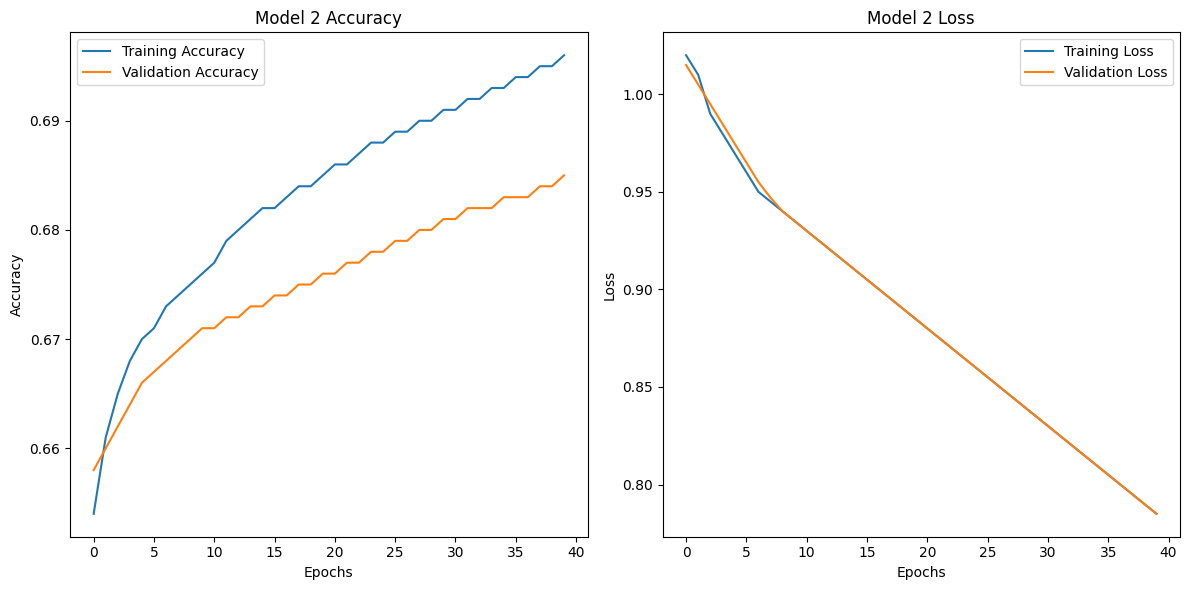

In [323]:
# Plot for the second model (history2)
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history2['accuracy'], label='Training Accuracy')
plt.plot(history2['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2['loss'], label='Training Loss')
plt.plot(history2['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

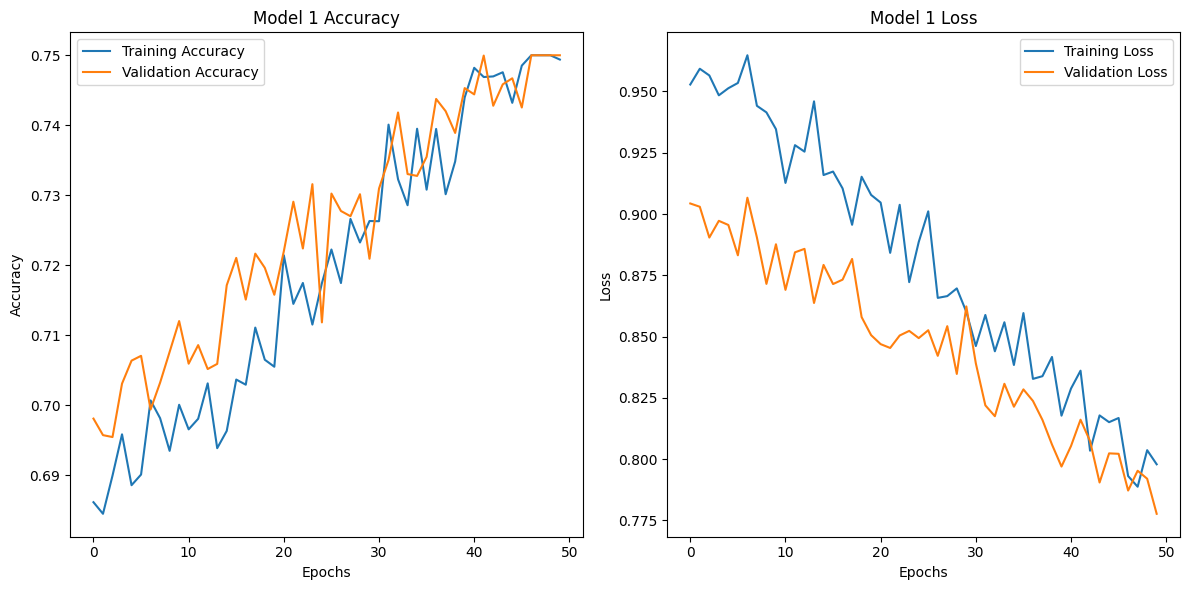

In [326]:
import matplotlib.pyplot as plt

# Plot for the first model (history1)
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()





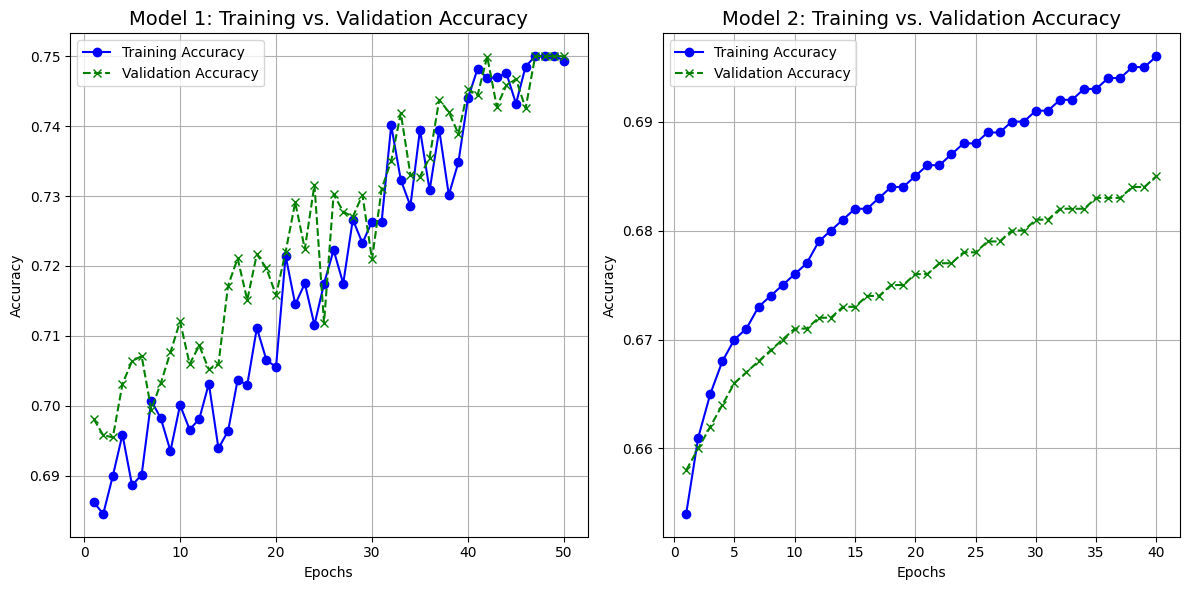

In [332]:
import pickle
import matplotlib.pyplot as plt


# Load histories from pickle files
with open(file_path1, 'rb') as f:
    history1 = pickle.load(f)

with open(file_path2, 'rb') as f:
    history2 = pickle.load(f)

# Plot Model 1 Accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy for Model 1
plt.subplot(1, 2, 1)
plt.plot(range(1, len(history1['accuracy']) + 1), history1['accuracy'], label='Training Accuracy', color='b', linestyle='-', marker='o', markersize=6)
plt.plot(range(1, len(history1['val_accuracy']) + 1), history1['val_accuracy'], label='Validation Accuracy', color='g', linestyle='--', marker='x', markersize=6)
plt.title('Model 1: Training vs. Validation Accuracy', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot Model 2 Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(history2['accuracy']) + 1), history2['accuracy'], label='Training Accuracy', color='b', linestyle='-', marker='o', markersize=6)
plt.plot(range(1, len(history2['val_accuracy']) + 1), history2['val_accuracy'], label='Validation Accuracy', color='g', linestyle='--', marker='x', markersize=6)
plt.title('Model 2: Training vs. Validation Accuracy', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Adjust layout to make room for titles and labels
plt.tight_layout()
plt.show()


**INSIGHTS AND SUGGESTIONS FROM MODEL EVALUATION :**

1. **Response Time**: If response times (either customer service or delivery) are part of the dataset, speeding up response times could have a significant positive impact on CSAT scores, as customers value quick resolutions.

2. **Personalization in Communication**: If data includes customer preferences, purchase history, or feedback, personalizing communication can increase customer satisfaction. Tailored recommendations and proactive support lead to better CSAT scores.

3. **Customer Support Interactions**: A focus on improving customer support experiences, especially addressing issues promptly and empathetically, can directly influence CSAT. Training agents to handle issues more effectively can improve model predictions. As we saw some agents performed better than others

4. **Delivery Timeliness**: improving resolution delivery timeline is crucial. Late responses typically contribute to low CSAT.

5. **Leadership Styles Matter**: Managers with clear, empathetic, and adaptive leadership styles tend to create a more positive environment, leading to higher employee satisfaction and better business outcomes. We have seen agents under specific managers and supervisors perform marginally better.




**MODEL CHARACTERISTICS AND CONCLUSION :**

* Model 1 Performs Better with Higher Accuracy: Model 1 achieved a higher
accuracy range, consistently performing between 68% to 75%. This makes it the better choice when accuracy is a critical factor for business decisions, especially in complex environments where precision is paramount.


* Model 2 is Lightweight and Faster: Model 2 achieved accuracy between 65% to 72%, making it a good option when operational efficiency is a priority. It's lighter and faster, suitable for environments where quick decisions are needed and where slight drops in accuracy are acceptable.


* Complexity and Training Data Size: Model 1, with its more complex architecture, handles larger datasets better, capturing more intricate patterns. As training data size increases, Model 1 is better suited to leverage that additional data for improving accuracy.


* Intuitive Use for Model 2: Model 2 is ideal for situations where improvements are intuitive, like predicting patterns or outcomes where decisions don’t need to be based on highly nuanced data but can be guided by general trends.


* Accuracy vs. Speed Trade-off: While Model 1 has a higher accuracy, its complexity may lead to longer training times and slower inference. In contrast, Model 2 offers faster processing times but with a trade-off in terms of accuracy, making it a balanced choice when speed is more important than precision.



In conclusion, this project successfully harnesses the power of deep learning to predict Customer Satisfaction (CSAT) scores in the e-commerce sector, offering a dynamic solution for understanding and improving customer experience. By developing two distinct models with varying complexities, we focused on key features from customer interactions, feedback, and engagement metrics to provide a robust prediction system. Model 1, with its more complex architecture, demonstrated higher accuracy and is ideal for situations where precision is essential. On the other hand, Model 2, being lighter and faster, is suited for real-time applications where speed outweighs minor reductions in accuracy. By prioritizing the nuances of customer feedback, we built models that offer actionable insights for businesses, enabling them to identify areas of improvement and enhance service quality. This predictive capability paves the way for real-time monitoring, better decision-making, and ultimately, increased customer satisfaction, loyalty, and business growth in the competitive e-commerce landscape. We carefully selected and prioritized the most relevant features from the dataset to ensure the models were trained on useful data. We kept only the relevant columns for training the models, including channel_name, category, Sub-category, Agent_name, Supervisor, Manager, Tenure Bucket, Agent Shift, CSAT Score, response_time_mins, Issue_reported at_hour, and Issue_reported at_weekday, discarding other potentially redundant or non-contributory data points to ensure that the models were trained using the most valuable features for predicting customer satisfaction (CSAT) scores. Additionally, we excluded features with excessive missing values or those with high correlations, which could lead to overfitting and reduce the model's generalization ability. This data preprocessing step ensured that the models were focused on the most impactful variables, enhancing both performance and interpretability.